# Portugal Bank Marketing [PART - 1]

In [521]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [522]:
df = pd.read_csv("bank.csv",sep = ';')

In [523]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3564,29,blue-collar,single,high.school,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,yes
6521,45,blue-collar,married,basic.4y,unknown,no,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35239,32,blue-collar,married,unknown,no,no,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
15709,36,blue-collar,married,basic.9y,no,no,no,cellular,jul,mon,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
27087,47,self-employed,married,basic.9y,unknown,yes,no,cellular,nov,fri,...,1,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
20160,31,technician,single,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
22577,36,management,married,university.degree,unknown,no,no,telephone,aug,fri,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
32946,49,blue-collar,single,high.school,no,yes,no,cellular,may,mon,...,3,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
19389,34,admin.,single,university.degree,unknown,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
38422,54,unemployed,married,basic.9y,no,yes,no,cellular,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,yes


In [524]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [525]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [526]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [527]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [528]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [529]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [530]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [531]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [532]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [533]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [534]:
df['duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

In [535]:
df['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [536]:
df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [537]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [538]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [539]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [540]:
df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

In [541]:
df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

# 1. Primary analysis of several categorical features :

In [542]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

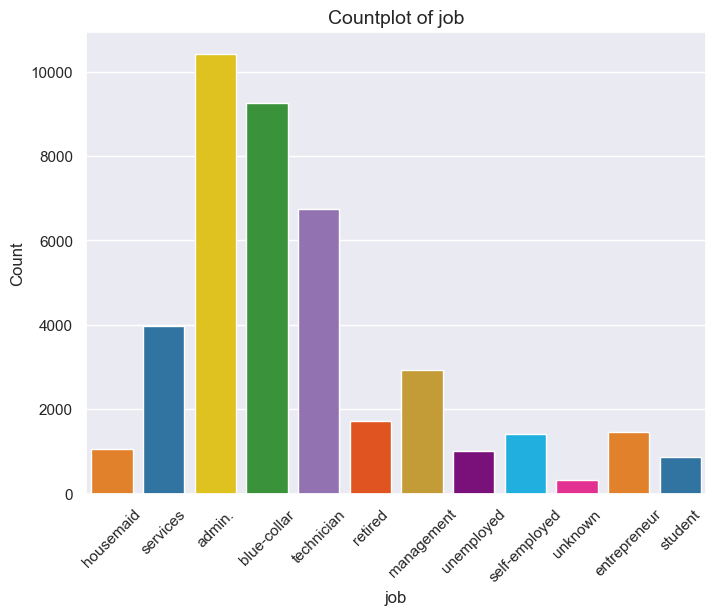

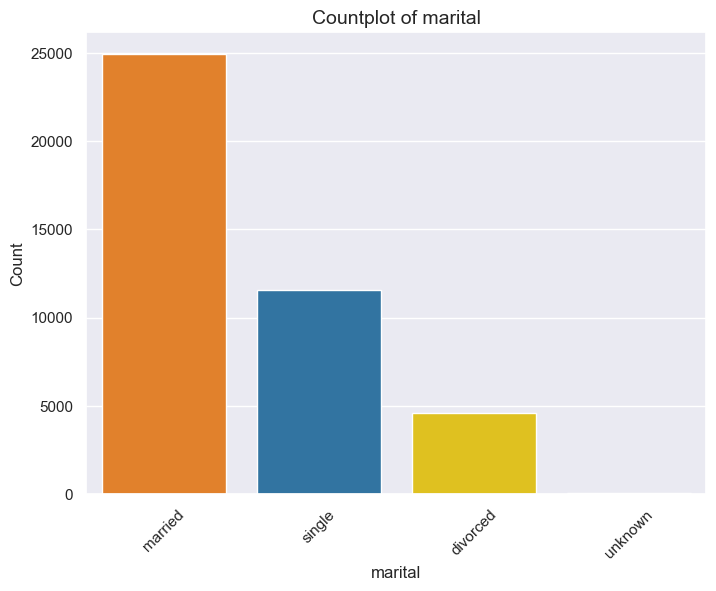

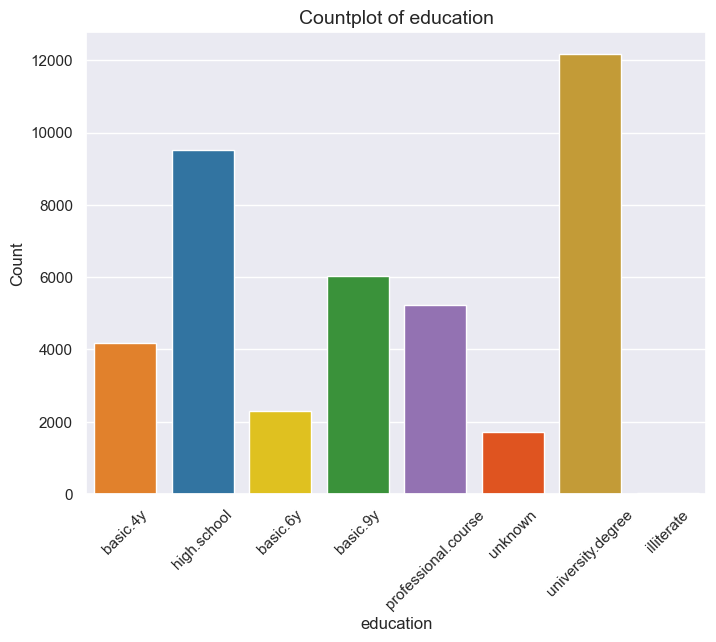

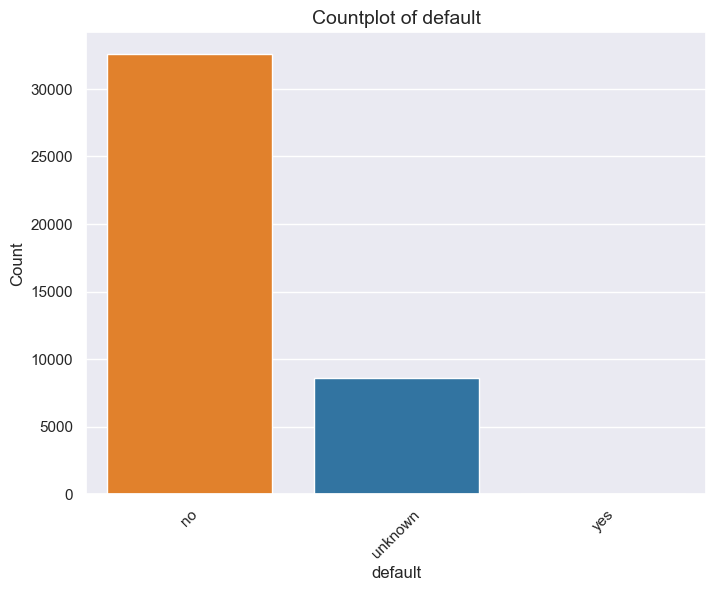

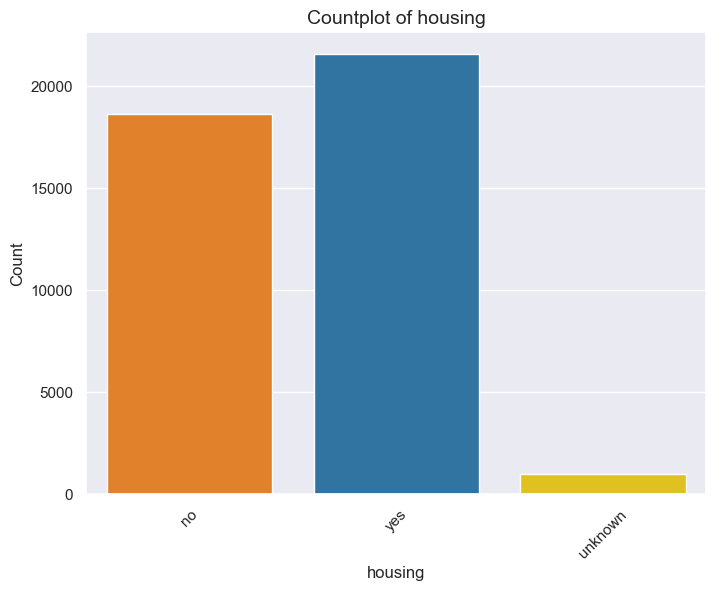

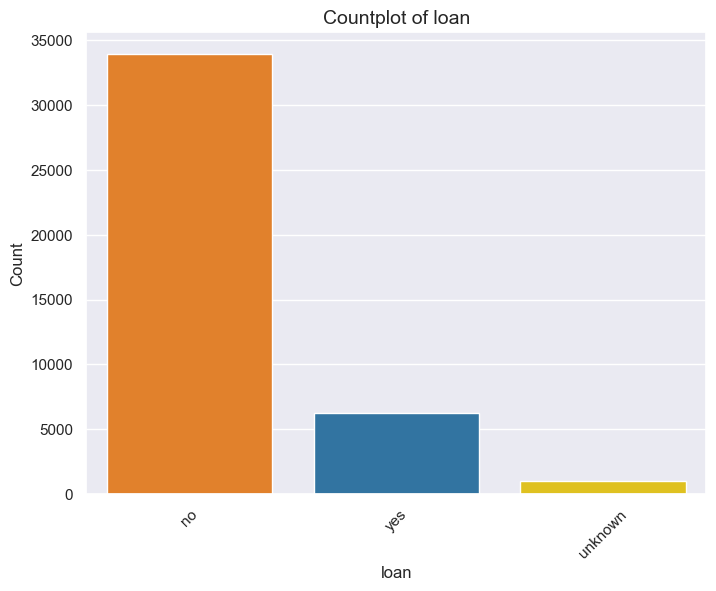

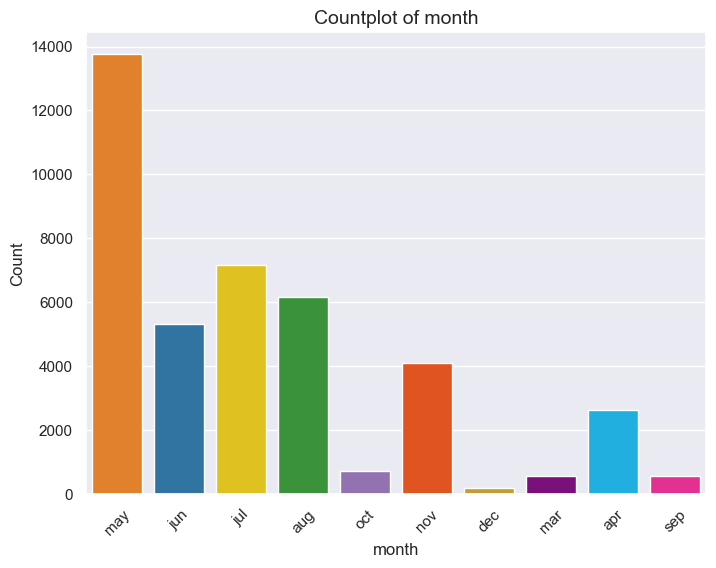

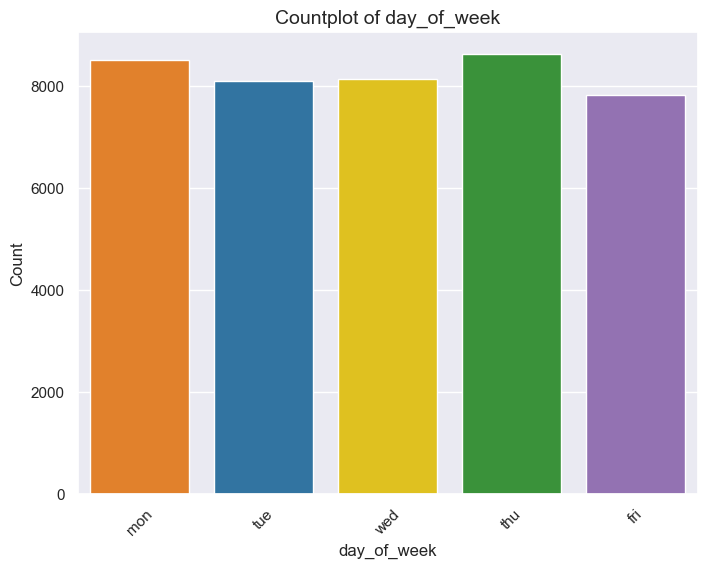

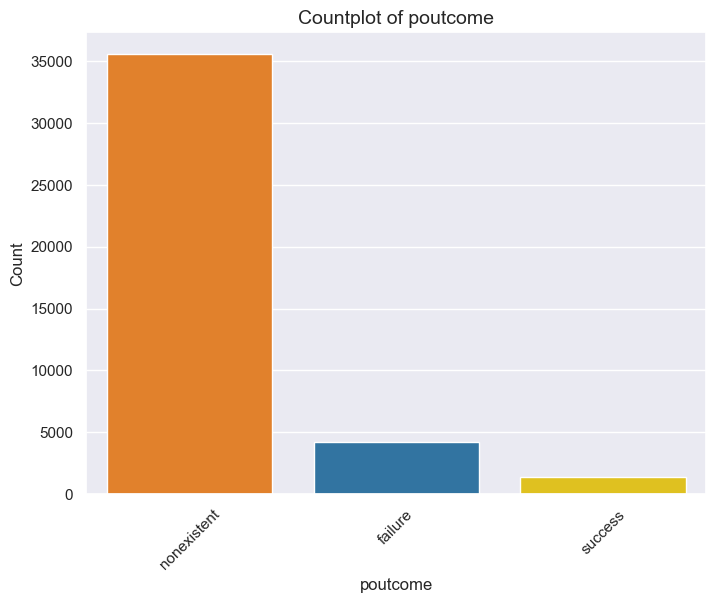

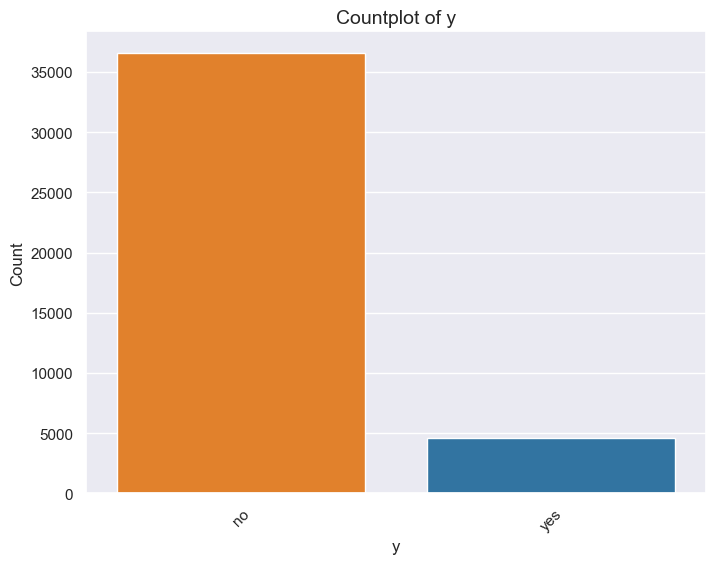

In [544]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = ['#FF7F0E', '#1F77B4', '#FFD700', '#2CA02C', '#9467BD', '#FF4500', '#DAA520', '#8B008B', '#00BFFF', '#FF1493']

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','month','day_of_week','poutcome','y']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette=color_palette)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Countplot of {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


## So from thge above we can infer that,
### job : Most of the clients are admins
### martial : Almost every client is married
### education : Majority of the clients are qualified either with a University degree or High school
### loan : Finally almost every client has not taken any loan
### day_of_week : On Monday and Thursday the last contact day is high
### Month :Last contact month of year is maximum during May and minimum during December

# 2. a) Missing Value Analysis

In [441]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## As we can see there are no missing values.

### Visulaization of missing values :

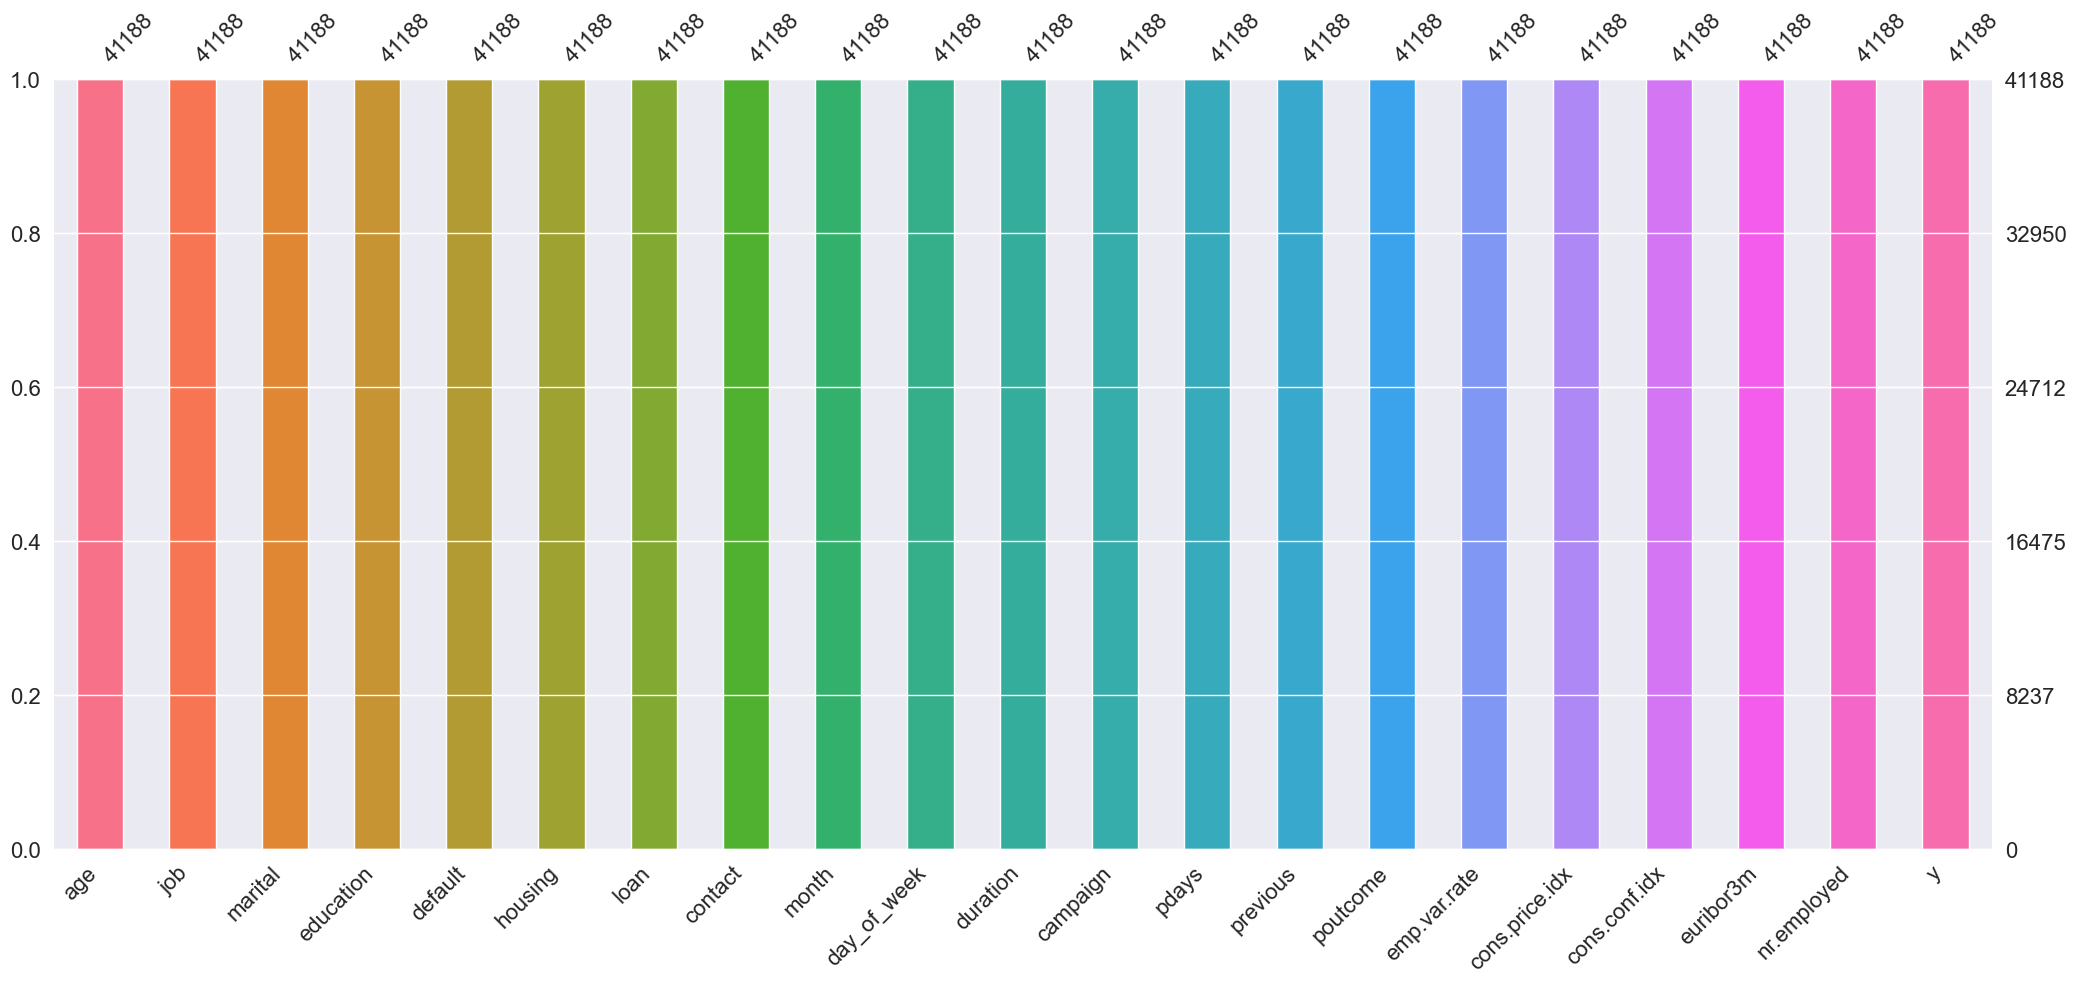

<Figure size 1200x800 with 0 Axes>

In [442]:
import missingno as msno

color_palette = sns.color_palette("husl", len(df.columns))

msno.bar(df, color=color_palette)


plt.figure(figsize=(12, 8))
plt.tight_layout()


plt.show()


### Thus we can clearly infer that all the columns has 41188 rows. Hence we can conclude that there are no missing values inthe give dataset

# 2. b) Label Encoding 

In [443]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  campaign  pdays  previous 

In [444]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### In the above code, we iterate over the list of categorical columns and apply label encoding using the fit_transform method of LabelEncoder. This will transform the categorical values into numerical representations. Finally, we print the updated dataset with the encoded values.

# 2. c) Selecting important features based on Random Forest

In [445]:
df.shape

(41188, 21)

In [446]:
X = df.drop('y', axis=1)
y = df['y']

In [447]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [448]:
rf.fit(X, y)

RandomForestClassifier()

In [449]:
importance = rf.feature_importances_

In [450]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

In [451]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [452]:
print(feature_importances.to_string(index=False))

       Feature  Importance
      duration    0.318664
     euribor3m    0.111015
           age    0.092442
   nr.employed    0.061087
           job    0.048817
     education    0.043432
      campaign    0.042366
   day_of_week    0.039959
 cons.conf.idx    0.031296
         pdays    0.029920
      poutcome    0.026858
       marital    0.024032
cons.price.idx    0.022534
  emp.var.rate    0.021647
       housing    0.020067
         month    0.017551
          loan    0.015132
      previous    0.013782
       contact    0.010387
       default    0.009014


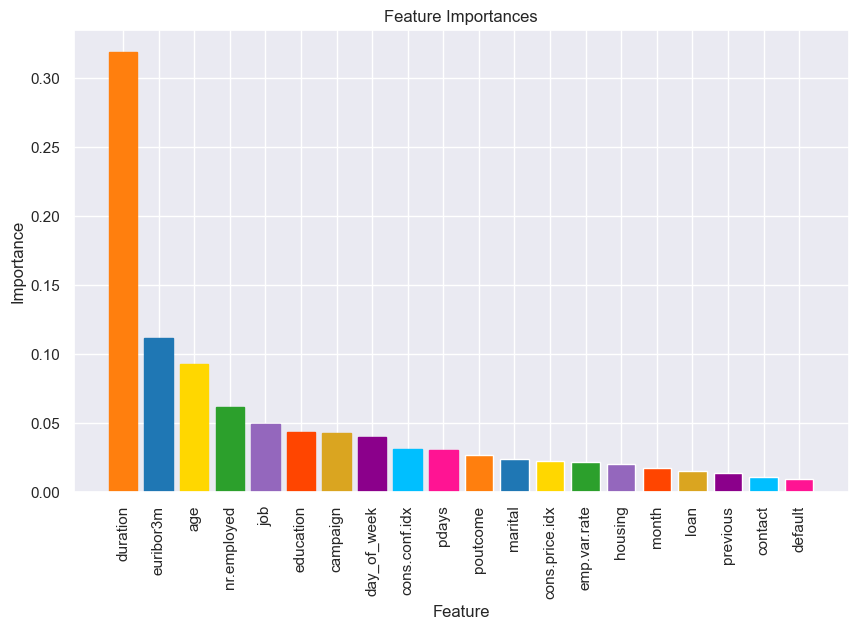

In [453]:
color_palette = ['#FF7F0E', '#1F77B4', '#FFD700', '#2CA02C', '#9467BD', '#FF4500', '#DAA520', '#8B008B', '#00BFFF', '#FF1493']

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], color=color_palette)

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)

for bar, color in zip(bars, color_palette):
    bar.set_color(color)

plt.show()


## Thus from the above visualization we can clearly infer that which feature affects the output of the target

In [454]:
top_selec = feature_importances.head(10)["Feature"].tolist()
top_selec

['duration',
 'euribor3m',
 'age',
 'nr.employed',
 'job',
 'education',
 'campaign',
 'day_of_week',
 'cons.conf.idx',
 'pdays']

## Thusconsider[duration,euribor3m,age,nr.employed,job,education,campaign,day_of_week,cons.conf.idx,pdays'] which has the highest importance.

# 2. d) Handling unbalanced data using SMOTE

In [455]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [457]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [458]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train)

## Thus the above address the imbalance issue in the training data by generating synthetic samples for the minority class using SMOTE


# 2. e) Standardize the data using the anyone of the scalers provided by sklearn

### In the above code (2. d) for performing SMOTE, a standard scalar function from sklearn is already used for standardizing the data

# 3. a) Logistic Regression

In [459]:
from sklearn.linear_model import LogisticRegression

In [460]:
logreg_model = LogisticRegression()

In [461]:
logreg_model.fit(X_train,y_train)

LogisticRegression()

In [462]:
logreg_model.score(X_train,y_train)

0.9078300455235205

In [463]:
logreg_model.score(X_test,y_test)


0.9095654285020636

# 3. b) AdaBoost

In [464]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [465]:
adaboost_model = AdaBoostClassifier()

In [466]:
adaboost_model.fit(X_train,y_train)

AdaBoostClassifier()

In [467]:
y_pred = adaboost_model.predict(X_test)

In [468]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.66      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [469]:
print(confusion_matrix(y_test, y_pred))

[[7115  188]
 [ 562  373]]


In [470]:
from sklearn import metrics

In [471]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9089584850691915


# 3. c) Naive Bayes

In [472]:
from sklearn.naive_bayes import GaussianNB

In [473]:
naivebayes_model = GaussianNB()

In [474]:
naivebayes_model.fit(X_train, y_train)

GaussianNB()

In [475]:
naivebayes_model.score(X_train,y_train)

0.8457663125948407

In [476]:
naivebayes_model.score(X_test,y_test)

0.8505705268268997

# 3. d) KNN

In [477]:
from sklearn.neighbors import KNeighborsClassifier

In [478]:
kn_model = KNeighborsClassifier()

In [479]:
kn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [480]:
kn_model.score(X_train,y_train)

0.9314719271623673

In [481]:
kn_model.score(X_test,y_test)

0.902282107307599

# 3. e) SVM

In [482]:
from sklearn.svm import SVC

In [483]:
svc_model = SVC()

In [484]:
svc_model.fit(X_train,y_train)

SVC()

In [485]:
svc_model.score(X_train,y_train)

0.8984825493171472

In [486]:
svc_model.score(X_test,y_test)

0.8945132313668366

# 4.The performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [487]:
from sklearn.model_selection import cross_val_score


In [488]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifiers = ['Logistic_Regression', 'AdaBoost', 'KNeighborsClassifier', 'SVC', 'NaiveBayes']
models = [logreg_model,adaboost_model,kn_model, svc_model, naivebayes_model]

for classifier, model in zip(classifiers, models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')

    print("Model: ", classifier)
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1)
    print("-------------------------------------------")


Model:  Logistic_Regression
Accuracy:  0.9095654285020636
Precision:  0.6626712328767124
Recall:  0.413903743315508
F1-score:  0.5095457537853851
-------------------------------------------
Model:  AdaBoost
Accuracy:  0.9089584850691915
Precision:  0.6648841354723708
Recall:  0.39893048128342246
F1-score:  0.49866310160427796
-------------------------------------------
Model:  KNeighborsClassifier
Accuracy:  0.902282107307599
Precision:  0.5850785340314136
Recall:  0.47807486631016044
F1-score:  0.5261918775750442
-------------------------------------------
Model:  SVC
Accuracy:  0.8945132313668366
Precision:  0.603125
Recall:  0.20641711229946524
F1-score:  0.3075697211155378
-------------------------------------------
Model:  NaiveBayes
Accuracy:  0.8505705268268997
Precision:  0.39764868603042874
Recall:  0.6149732620320856
F1-score:  0.48299034019319614
-------------------------------------------


## Based on the provided performance metrics, it appears that the "Logistic_Regression" model performs better in terms of accuracy, precision, recall, and F1-score compared to the other models.

## The "Logistic_Regression" model has the highest accuracy score of 0.9096, indicating that it correctly predicts the target variable in approximately 91% of the cases.

## In terms of precision the "Logistic_Regression" model achieves a score of 0.6627. This indicates that when it predicts a positive outcome, it is correct about 66% of the time.

## The recall score is 0.4139 for the "Logistic_Regression" model. This means that the model is able to capture approximately 41% of the actual positive instances.

## The F1-score is 0.5095 for the "Logistic_Regression" model. This score balances both precision and recall and provides an overall measure of the model's performance.

## Overall, the "Logistic_Regression" model performs better in predicting the target variable compared to the other models because it achieves higher accuracy, precision, recall, and F1-score. However, it's important to consider the specific requirements and objectives of the problem at hand when determining the most suitable model.





## ---------------------------------------------------------------------------------------------------------

# Monthwise Market Arrivals [PART - 2]

In [489]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [490]:
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [491]:
df.sample(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
3110,GUWAHATI,July,2013,9701,2340,2756,2572,ASM,GUWAHATI,July-2013
6357,MALEGAON(MS),August,2006,63105,111,398,319,MS,MALEGAON,August-2006
5615,LASALGAON(MS),November,2010,186705,240,2813,1452,MS,LASALGAON,November-2010
7751,PIMPALGAON(MS),October,2007,46973,968,1459,1334,MS,PIMPALGAON,October-2007
5171,KOLKATA,September,2006,237060,579,777,680,WB,KOLKATA,September-2006
2384,DHAVANGERE(KNT),March,2014,27550,312,897,604,KNT,DHAVANGERE,March-2014
2368,DHAVANGERE(KNT),February,2011,14560,825,1335,1083,KNT,DHAVANGERE,February-2011
3460,HUBLI(KNT),November,2012,122667,307,1452,855,KNT,HUBLI,November-2012
8959,SATANA(MS),February,2010,37639,215,1225,1028,MS,SATANA,February-2010
4867,KARNAL(HR),September,2012,561,450,775,675,HR,KARNAL,September-2012


In [492]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [493]:
df['date'] = df['date'].apply(lambda x : pd.to_datetime(x))

In [494]:
df.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,2013-01-01
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,2014-01-01
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,2015-01-01
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,2005-02-01
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,2006-02-01


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


In [496]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

# 1. Modal price of onion for each month for the Mumbai market

In [497]:
df['city'].unique()

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [498]:
mumbai_df = df[df["city"] == "MUMBAI"]

mumbai_df.set_index("date", inplace=True)

mumbai_df.drop(["market", "year", "quantity", "priceMin", "priceMax", "state", "city"], axis=1, inplace=True)

monthly_modal_price = mumbai_df.groupby("month")["priceMod"].mean()

print(monthly_modal_price)

month
April         631.583333
August       1427.416667
December     1318.833333
February      865.000000
January      1091.153846
July         1048.166667
June          884.583333
March         674.333333
May           679.666667
November     1571.333333
October      1617.166667
September    1586.916667
Name: priceMod, dtype: float64


## Here we can infer modal price of onion for each month for the Mumbai market

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [500]:
df.drop(['market', 'quantity', 'priceMin', 'priceMax', 'state', 'city'], axis=1, inplace=True)

In [501]:
df = df.sort_values('date')

In [502]:
df = df.groupby('date')['priceMod'].sum().reset_index()

In [503]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='date', length=242, freq=None)

## Time Series Analysis
### Visualizing data

Text(0.5, 0, 'Year')

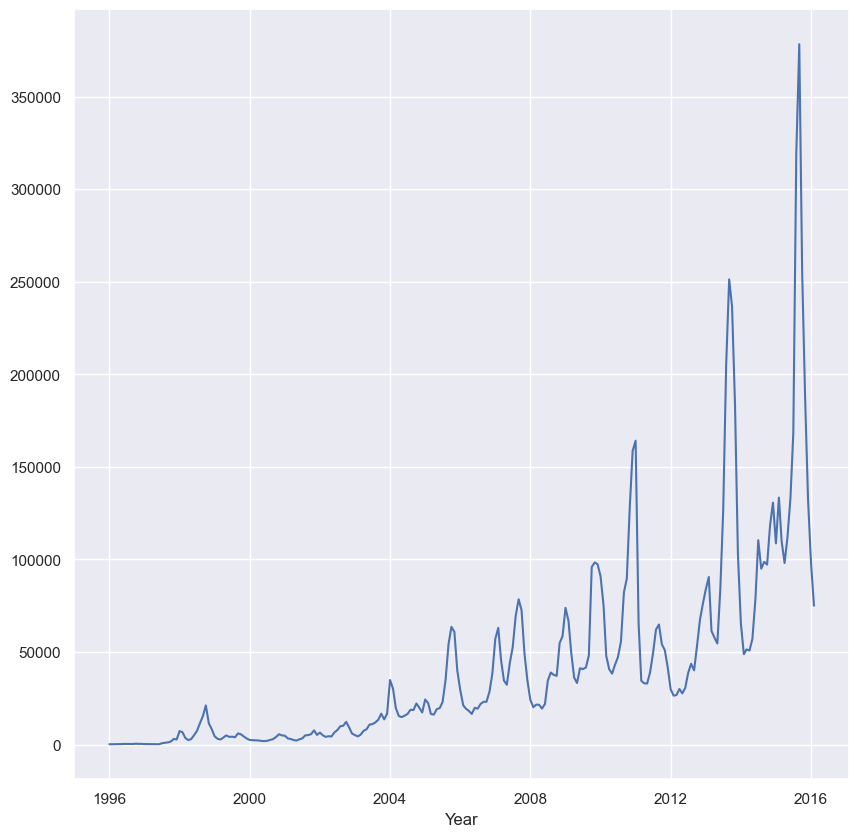

In [504]:
fig = plt.figure(figsize=(10,10))
plt.plot(df)
plt.xlabel("Year")

In [505]:
data = df['priceMod'].resample('MS').mean()

In [506]:
data.head()

date
1996-01-01    226.0
1996-02-01    186.0
1996-03-01    243.0
1996-04-01    254.0
1996-05-01    269.0
Freq: MS, Name: priceMod, dtype: float64

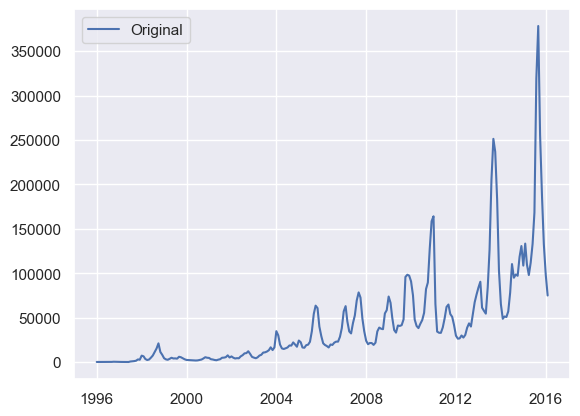

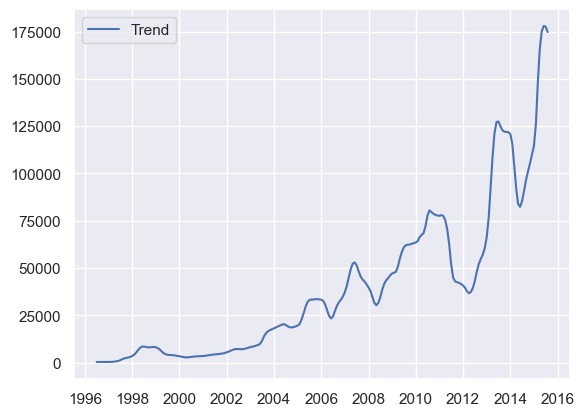

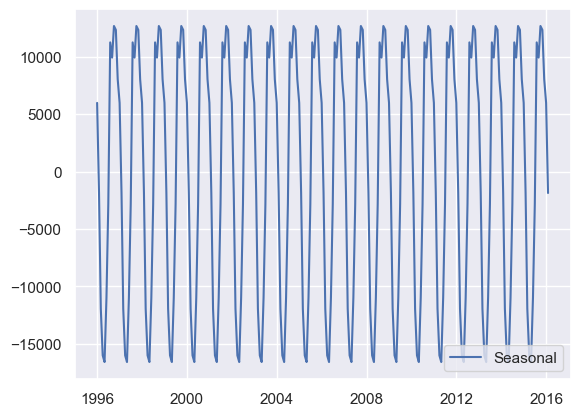

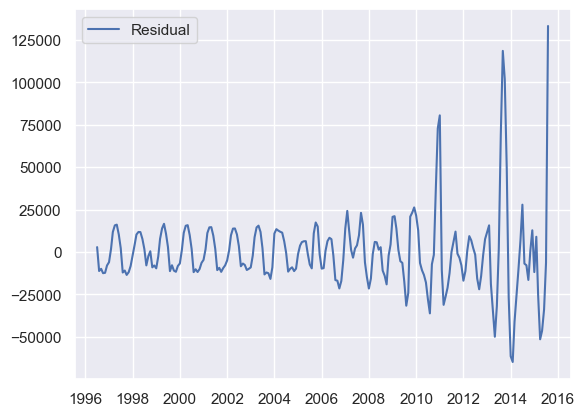

In [507]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

plt.plot(data, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

### The presence of a strong upward or downward trend can be inferred from the time series plot. Further analysis using techniques like exponential smoothing or ARIMA modeling can help quantify and forecast the trend.

## 2) Build time series model and check the performance of the model using RMSE

## Time Series Forcasting using ARIMA

In [508]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [509]:
size = int(len(data) * 0.95)
train, test = data[0:size], data[size:len(data)]

In [510]:
test.head()

date
2015-02-01    133433.0
2015-03-01    109975.0
2015-04-01     98081.0
2015-05-01    111959.0
2015-06-01    133088.0
Freq: MS, Name: priceMod, dtype: float64

## Parameter selection for the model

In [511]:
from pylab import rcParams

order_list = []
param_seasonal_list = []
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            order_list.append(param)
            param_seasonal_list.append(param_seasonal)
            aic_list.append(results.aic)
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22529D+01    |proj g|=  8.18900D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.189D-08   1.225D+01
  F =   12.252922615230535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5613.838557775585
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.05027D+01    |proj g|=  7.16474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     11      1     0     0   4.092D-06   1.050D+01
  F =   10.502695172831469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4816.2343891568125
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22111D+01    |proj g|=  5.23225D-01

At iterate    5    f=  1.18017D+01    |proj g|=  5.96277D-03

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5079.530761059607
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04625D+01    |proj g|=  5.09315D-01

At iterate    5    f=  1.02621D+01    |proj g|=  1.66206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      8      1     0     0   1.572D-05   1.026D+01
  F =   10.262048553647112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4706.018237570377
RUNNING THE L-BFGS-B C

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   1.926D-05   9.874D+00
  F =   9.8742311241971983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4526.397854882317
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04288D+01    |proj g|=  4.42562D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02015D+01    |proj g|=  1.52896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   8.303D-07   1.020D+01
  F =   10.201537264091066     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:4678.304066953708
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05417D+01    |proj g|=  1.25296D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:4534.130546235661
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78865D+00    |proj g|=  8.41168D-02

At iterate    5    f=  9.73361D+00    |proj g|=  2.78779D-02

At iterate   10    f=  9.73116D+00    |proj g|=  2.40347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     18      1     0     0   2.428D-05   9.731D+00
  F =   9.7311559914594312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.611D-05   1.070D+01
  F =   10.697239439007209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4903.335663065302
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91531D+00    |proj g|=  1.16681D-01

At iterate    5    f=  9.90410D+00    |proj g|=  1.75707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:4553.28376391074
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93958D+00    |proj g|=  1.29976D-01

At iterate    5    f=  9.89520D+00    |proj g|=  3.25241D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   2.100D-05   9.895D+00
  F =   9.8947061949812838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:4539.775437301428
RUNNING THE L-BFGS-B CO

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.74044D+00    |proj g|=  3.31264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   2.247D-05   9.740D+00
  F =   9.7404337011826634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:4469.11863514166
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08219D+01    |proj g|=  1.92956D+00

At iterate    5    f=  1.02844D+01    |proj g|=  4.52062D-02

           * * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.77414D+00    |proj g|=  2.29800D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.298D-05   9.774D+00
  F =   9.7741411015502973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:4482.556624510036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02439D+01    |proj g|=  9.65282D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  9.83370D+00    |proj g|=  1.34024D-02

At iterate   15    f=  9.81954D+00    |proj g|=  1.28790D-01

At iterate   20    f=  9.79619D+00    |proj g|=  1.76789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     27      1     0     0   1.873D-05   9.796D+00
  F =   9.7961890164207350     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:4492.654569520697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:4668.783326865865
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05290D+01    |proj g|=  8.07817D-02

At iterate    5    f=  1.05232D+01    |proj g|=  2.14104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   3.769D-06   1.052D+01
  F =   10.523216533713743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:4825.633172440895
RUNNING THE L-BFGS-B C

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.01717D+01    |proj g|=  3.64437D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   4.180D-06   1.017D+01
  F =   10.171663834106969     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4668.622036020992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83482D+00    |proj g|=  4.27887D-02

At iterate    5    f=  9.82910D+00    |proj g|=  1.27396D-04

           * *

In [512]:
min_val = aic_list.index(min(aic_list))
order = order_list[min_val]
seasonal_order = param_seasonal_list[min_val]

## Fitting the ARIMA model :

In [513]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.78024D+00    |proj g|=  7.34431D-02

At iterate    5    f=  9.71375D+00    |proj g|=  1.42477D-02

At iterate   10    f=  9.71281D+00    |proj g|=  2.46615D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     15      1     0     0   2.466D-05   9.713D+00
  F =   9.7128076480961507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025    

 This problem is unconstrained.


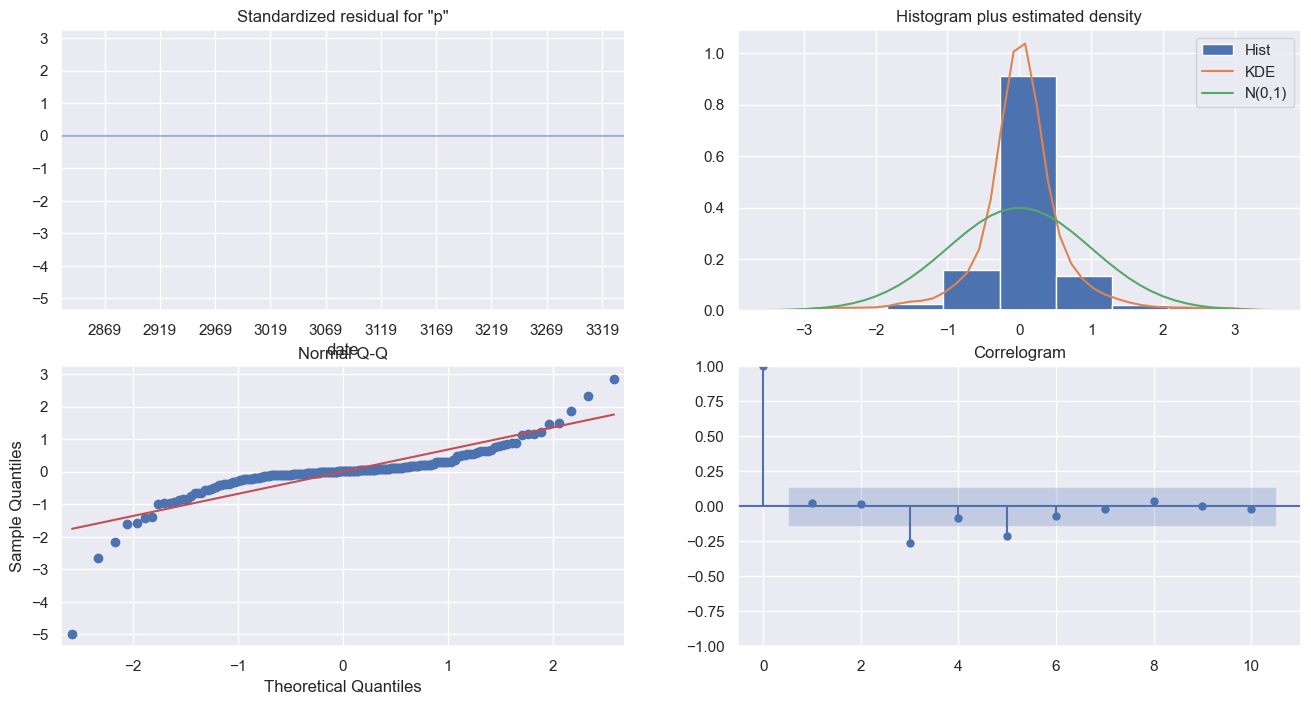

In [514]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

            lower priceMod  upper priceMod
2015-02-01    43953.979171   118988.013573
2015-03-01    -7651.621850   133354.964597
2015-04-01   -38566.569616   155314.297501
2015-05-01   -63164.592891   174402.132157
2015-06-01   -77276.883926   197760.164542
2015-07-01   -88207.087705   219955.743276
2015-08-01   -84875.879560   253233.207318
2015-09-01   -88172.639432   277452.601766
2015-10-01   -97144.816011   294070.179967
2015-11-01  -114701.182769   300530.684513
2015-12-01  -137431.886073   300502.231151
2016-01-01  -148845.886542   310669.872790
2016-02-01  -167688.528167   309584.512799


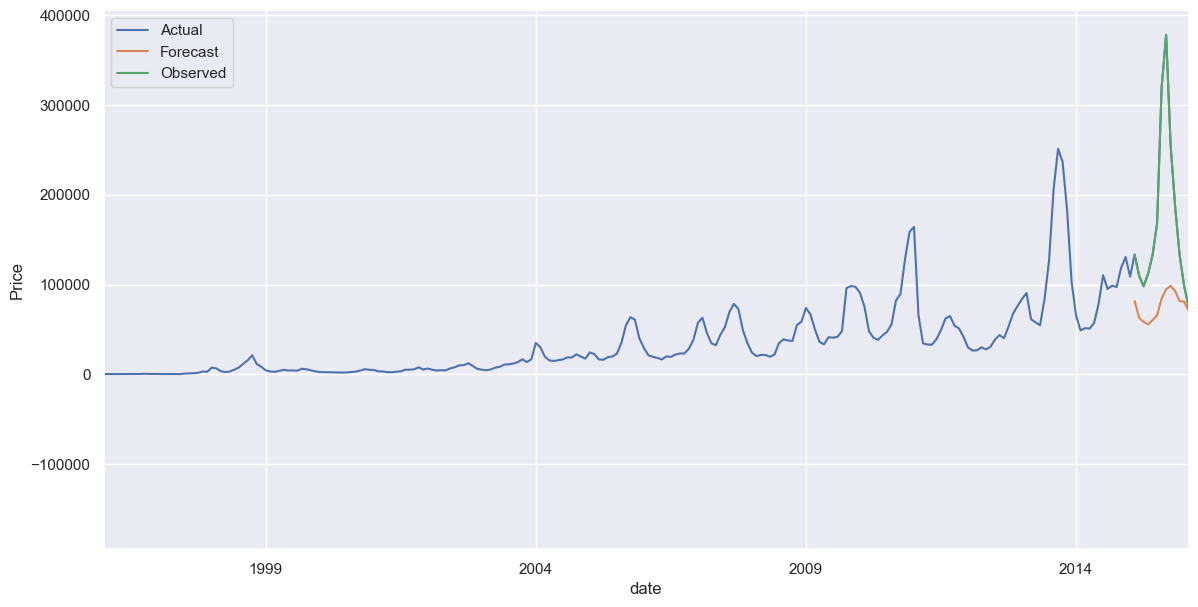

In [515]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
test.plot(label = "Observed")
print(pred_ci)
plt.legend(loc = "best")
plt.show()

In [516]:
Result = pd.DataFrame()
Result['Actual'] = test
Result['Predicted'] = pred_ci['upper priceMod']

Result

,Actual,Predicted
date,,
2015-02-01,133433.0,118988.013573
2015-03-01,109975.0,133354.964597
2015-04-01,98081.0,155314.297501
2015-05-01,111959.0,174402.132157
2015-06-01,133088.0,197760.164542
2015-07-01,168455.0,219955.743276
2015-08-01,319247.0,253233.207318
2015-09-01,378318.0,277452.601766
2015-10-01,255491.0,294070.179967


In [517]:
mse = ((Result['Actual'] - Result['Predicted']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 13219495880.16
The Root Mean Squared Error of our forecasts is 114976.07


### Thus a Time series model and check the performance of the model using RMSE

# 3. Plot ACF and PACF plots

In [518]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

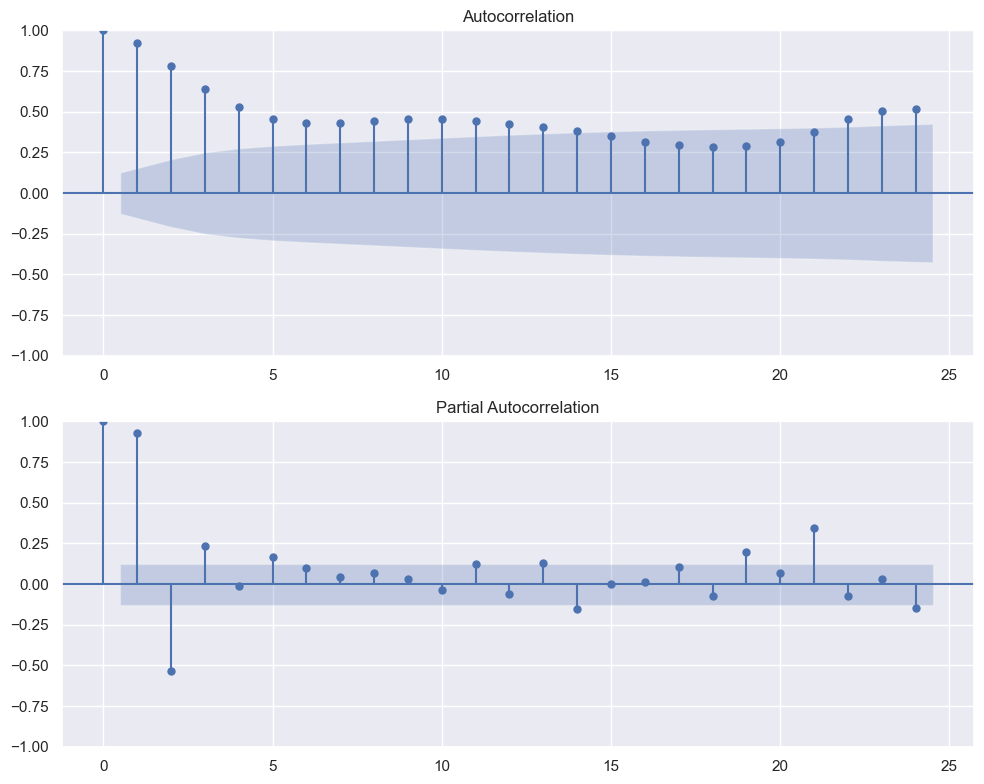

In [519]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['priceMod'], ax=ax[0])
plot_pacf(df['priceMod'], ax=ax[1])
plt.tight_layout()
plt.show()

### The ACF plot indicates a significant autocorrelation at lag 12, suggesting a strong seasonal pattern with a yearly cycle. This indicates that onion prices exhibit a consistent pattern that repeats every year.

## 4.Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

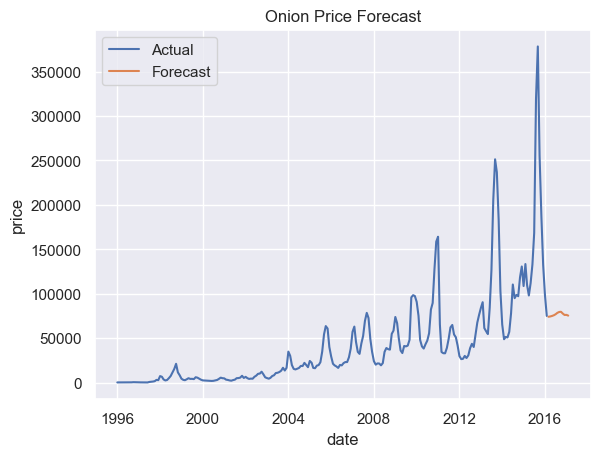

              Actual      Forecast
2015-03-01  109975.0           NaN
2015-04-01   98081.0           NaN
2015-05-01  111959.0           NaN
2015-06-01  133088.0           NaN
2015-07-01  168455.0           NaN
2015-08-01  319247.0           NaN
2015-09-01  378318.0           NaN
2015-10-01  255491.0           NaN
2015-11-01  186994.0           NaN
2015-12-01  132759.0           NaN
2016-01-01   98476.0           NaN
2016-02-01   75034.0           NaN
2016-03-01       NaN  74094.713459
2016-04-01       NaN  74458.854503
2016-05-01       NaN  75025.454884
2016-06-01       NaN  75810.051598
2016-07-01       NaN  76943.371949
2016-08-01       NaN  78557.342526
2016-09-01       NaN  79498.033820
2016-10-01       NaN  79721.760609
2016-11-01       NaN  77674.954553
2016-12-01       NaN  76120.757314
2017-01-01       NaN  76251.867516
2017-02-01       NaN  75424.628208
RMSE: 131857.54520259236


In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

model = ExponentialSmoothing(df['priceMod'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

forecast = model_fit.forecast(12)

plt.plot(df['priceMod'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Onion Price Forecast')
plt.legend()
plt.show()

df_forecast = pd.DataFrame({'Actual': df['priceMod'][-12:], 'Forecast': forecast})
print(df_forecast)

actual = df['priceMod'][-12:]
rmse = np.sqrt(mean_squared_error(actual, forecast))
print('RMSE:', rmse)


## Therefore exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market is performed and visualized above

# -----------------------------------------------------------------------------------------